In [29]:
# All Imports
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 1.1

### Contents
1. [Assumptions](#assumptions)
2. Graph inbuilt cos function
3. Deriving the taylor series
4. Compare inbuilt cos function to taylor series truncated at 1...n terms 
5. Compare the "real" (assumed) value of cos to taylor series for various domain values
6. What happens at large domain values


#### Assumptions <a id="assumptions"></a>
1. I am assuming that the inbuilt cos(x) function approximates the "real" value of the the cosine function appropriately - this is the foundation of the model error.
2. I am assuming that the value of math.pi gives me the "real" value of pi

#### Graph inbuilt $cos(x)$ function

In [30]:
def plot_real_cos(domain_start, domain_end, spacing):
    x = np.linspace(domain_start, domain_end, spacing)
    y = np.cos(x)
    # Labels and making it pretty ========================
    plt.xlabel('x')
    plt.ylabel('cos(x)')
    plt.title('cos(x) plot')
    # remove bottom and top spines
    plt.gca().spines['bottom'].set_position('center')
    plt.gca().spines['top'].set_color('none')
    # ===================================================
    plt.plot(x, y)
    plt.show()

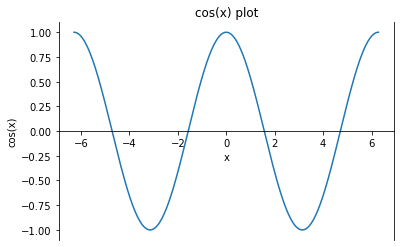

In [31]:
domain_start = -2 * math.pi
domain_end = 2 * math.pi
spacing = 1000
plot_real_cos(domain_start, domain_end, spacing)

#### Deriving the taylor series

The taylor series provides an approximation for a given function represented as the sum of infinite terms expressed in in terms of the functions' derivates centered at particular point.

A taylor series centered around the point 0 has a special name - Maclaurin series, i.e. Maclaurin series is a special case of the taylor series.

$$
\begin{align*}
& f(x) = f(c) + f'(c)(x-c) + f''(c)\frac{(x-c)^2}{2!} + f'''(c)\frac{(x-c)^3}{3!} + .... \\

& \text{where, } \\

& c = 0 \text{ i.e point the function is centered around} \\
\end{align*}
$$

Finding the derivative of the function

$$
\begin{align*}

& f(x)      = cos(x)    = cos(0)    = 1   \\
& f'(x)     = -sin(x)   = -sin(0)   = 0   \\
& f''(x)    = -cos(x)   = -cos(0)   = -1  \\
& f'''(x)   = sin(x)    = sin(0)    = 0   \\
& f''''(x)  = cos(x)    = cos(0) = 1   \\

\end{align*}
$$

Using the above values in the formula for $f(x) = cos(x)$

$$
cos(x) = 1 + [0(x-0)] + [(-1)\frac{(x-0)^2}{2!}] + [0\frac{(x-0)^3}{3!}] + [(1)\frac{(x-0)^4}{4!}]....
$$

##### Series formula
$$
\begin{align*}
& \sum^{\infty}_{n=0} (-1)^n * \frac{x^{2n}}{(2n)!}, x \in (-\infty, \infty)
\end{align*}
$$


In [32]:
def taylor_cos(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of cos(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    return np.sum([(-1)**i * (x**(2*i) / math.factorial(2*i)) for i in range(n)])

#### Graphing the taylor series function truncated up to 5 intervals

In [33]:
def plot_taylor_cos(domain_start, domain_end, spacing, truncate):
    x = np.linspace(domain_start, domain_end, spacing)
    y = [taylor_cos(i, truncate) for i in x]
    # Labels and making it pretty ========================
    plt.xlabel('x')
    plt.ylabel('cos(x)')
    plt.title('taylor series cos(x) plot truncated at n = ' + str(truncate))
    # remove bottom and top spines
    plt.gca().spines['bottom'].set_position('center')
    plt.gca().spines['top'].set_color('none')
    # ===================================================
    plt.plot(x, y)
    plt.show()

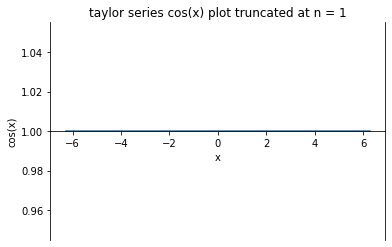

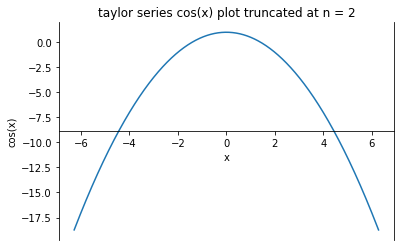

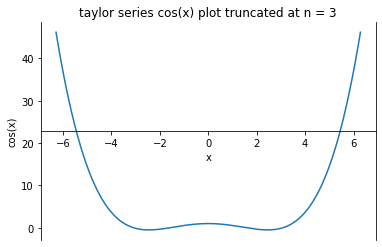

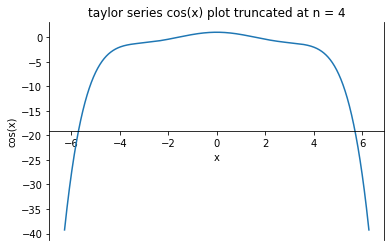

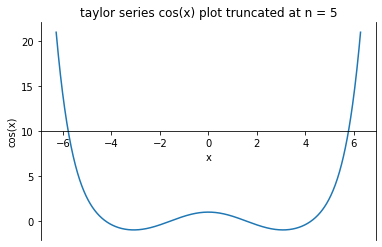

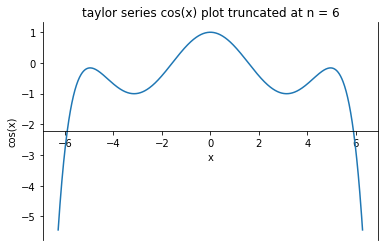

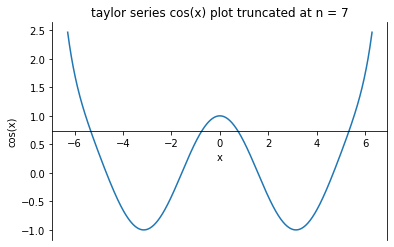

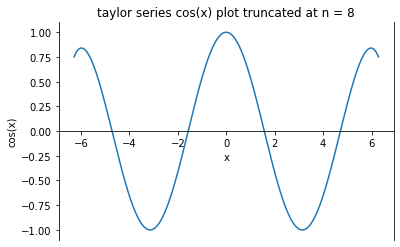

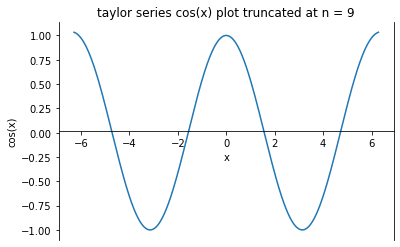

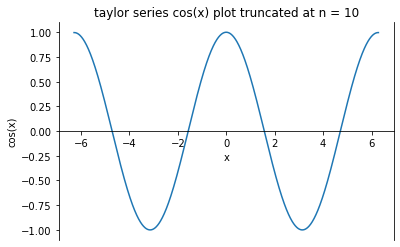

In [34]:
domain_start = -2 * math.pi
domain_end = 2 * math.pi
spacing = 1000

for trunc in range(1, 11):
    plot_taylor_cos(domain_start, domain_end, spacing, trunc)

##### Conclusion for [Graphing the taylor series function truncated up to 5 intervals]
From the above plot we can see that as we increase the number of terms for the calculating the value of cos(x) where $x \in [-2\pi, 2\pi]$ the approximation of the function improves i.e. more terms is directly propertional to better approximation.



#### Plotting real vs estimated values

For this section I'm examining how fast the taylor series converges to the real value of cos(x) for some commonly used points of interest x

Chosen points of interest
$$
x \in \{0, \frac{\pi}{6}, \frac{\pi}{4}, \frac{\pi}{2}, \pi, \frac{3\pi}{2}, 2\pi\}
$$

Below, I am plotting a red horizontal line which represents the real value of $cos(x)$ for a particular domain value x, along with a scatter plot where the y axis shows the value of the estimation and the x axis shows the number of terms the taylor series was truncated at.

In [35]:
def plot_real_vs_estimate(domain: int, terms: int, str_title) -> None:
    real_y = np.cos(domain)

    # IMPORTANT ===========================================================================
    # range_terms = number of terms after which taylor series will be truncated
    range_terms = range(1, terms+1)
    # estimate_y = estimated value of cos(domain) truncated at various levels up to terms
    estimate_y = [taylor_cos(domain, i) for i in range_terms]
    # =====================================================================================

    # Plotting the graph ==================================================================
    
    # plt.figure(dpi=PLOT_DPI)
    plt.scatter(range_terms, estimate_y, label=f"cos({domain}) estimate")
    
    # add line for real value
    plt.axhline(y=real_y, color='r', linestyle='-', label=f"cos({domain}) real")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Number of terms taylor series is truncated at')
    plt.ylabel('Value')
    plt.title(str_title)
    plt.xticks(range(2, terms+1, 2))
    plt.show()

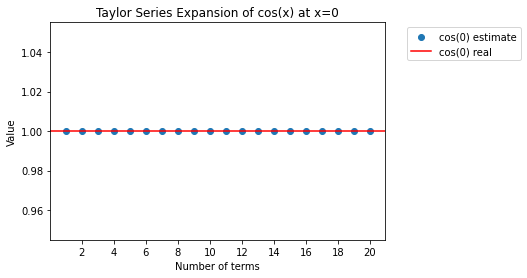

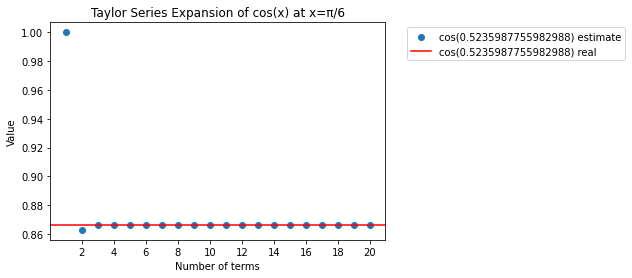

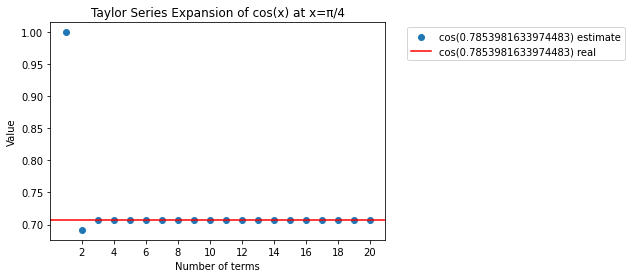

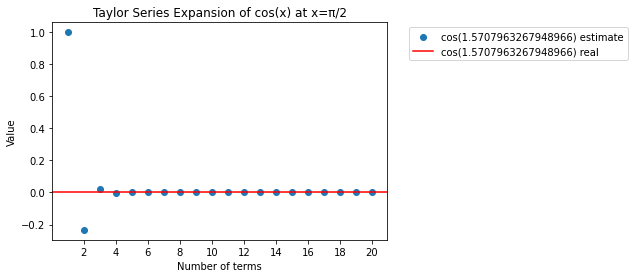

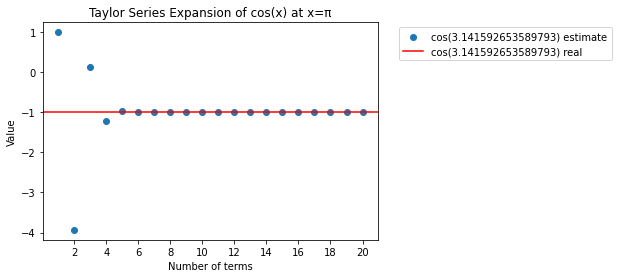

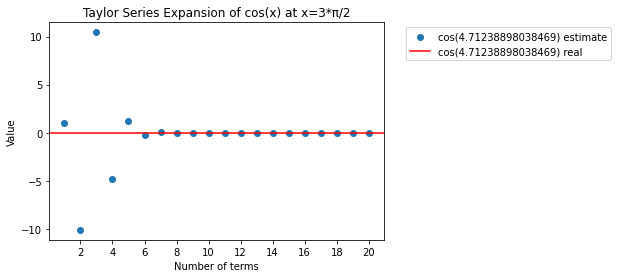

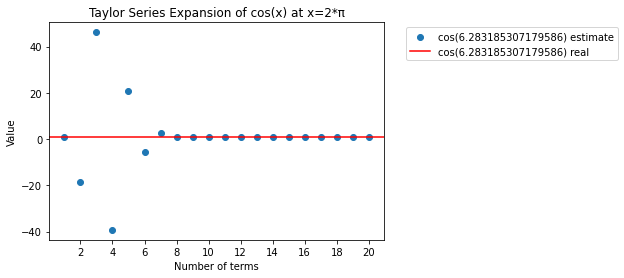

In [36]:
domain = [0, np.pi/6, np.pi/4, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
domain_str = ['0', 'π/6', 'π/4', 'π/2', 'π', '3*π/2', '2*π']
max_terms = 20

for i, d in enumerate(domain):
    plot_real_vs_estimate(d, max_terms, f"Taylor Series Expansion of cos(x) at x={domain_str[i]}")

##### Conclusion for [Plotting real vs estimated values]

From the above plot we can observe that values close to 0 require less terms in the taylor series before they converge to the real value. Conversely values farther away from 0 require more terms before converging to the real value

#### What happens at large values of x

So far I have made the following conclusions
1. More terms means better approximation
2. Values close to 0 require fewer terms of taylor series to approximate

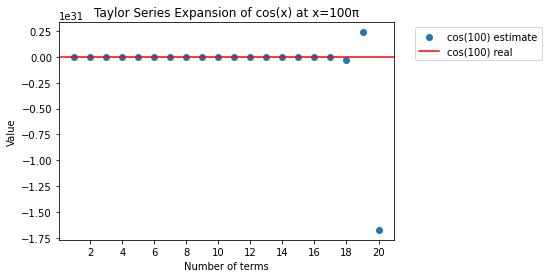

In [70]:
large_domain = 100
plot_real_vs_estimate(large_domain, max_terms, f"Taylor Series Expansion of cos(x) at x=100π")